In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [57]:
df = pd.read_json('news_ft.json')
df.head()

,title,date
0,‘Welfare to work’ rules become sticking point ...,2023-05-18
1,Russia admits ‘problems’ as energy revenues fall,2023-05-18
2,France holds up EU energy agreement over nucle...,2023-05-18
3,Penguin Random House sues Florida school distr...,2023-05-18
4,Ecuador’s president triggers ‘mutual death’ cl...,2023-05-18


In [6]:


anchors = [
    "ukraine",
    "ukrainian",
    "russia",
    "russian",
    "dpr",
    "lpr",
    "putin",
    "zelensky",
    "war"
]



In [58]:
def check(string: str):
    for word in anchors:
        if word in string.lower():
            return True
    return False

war_df = df[df['title'].apply(lambda x: check(x))]
war_df.head()


,title,date
1,Russia admits ‘problems’ as energy revenues fall,2023-05-18
6,Ukraine’s allies fear military support will fa...,2023-05-18
9,Xi Jinping courts Central Asia as Russian infl...,2023-05-18
13,Tracking Russia’s invasion of Ukraine in maps,2023-05-18
16,Global warming likely to exceed 1.5C within fi...,2023-05-18


In [59]:
war_perc = []
dates = list(war_df.date.unique())
sorted_dates = sorted(dates, key=lambda x: x.to_pydatetime())
for date in sorted_dates:
    news_this_date = df[df['date'] == date].shape[0]
    news_war = war_df[war_df['date'] == date].shape[0]
    war_perc.append(round(news_war/news_this_date * 100, 2))

str_dates = []
for date in dates:
    str_dates.append(str(date.date()))
str_dates = sorted(str_dates)

['2022-02-28',
 '2022-03-09',
 '2022-04-15',
 '2022-07-14',
 '2022-09-08',
 '2022-09-11',
 '2022-11-11',
 '2023-01-16',
 '2023-05-18']

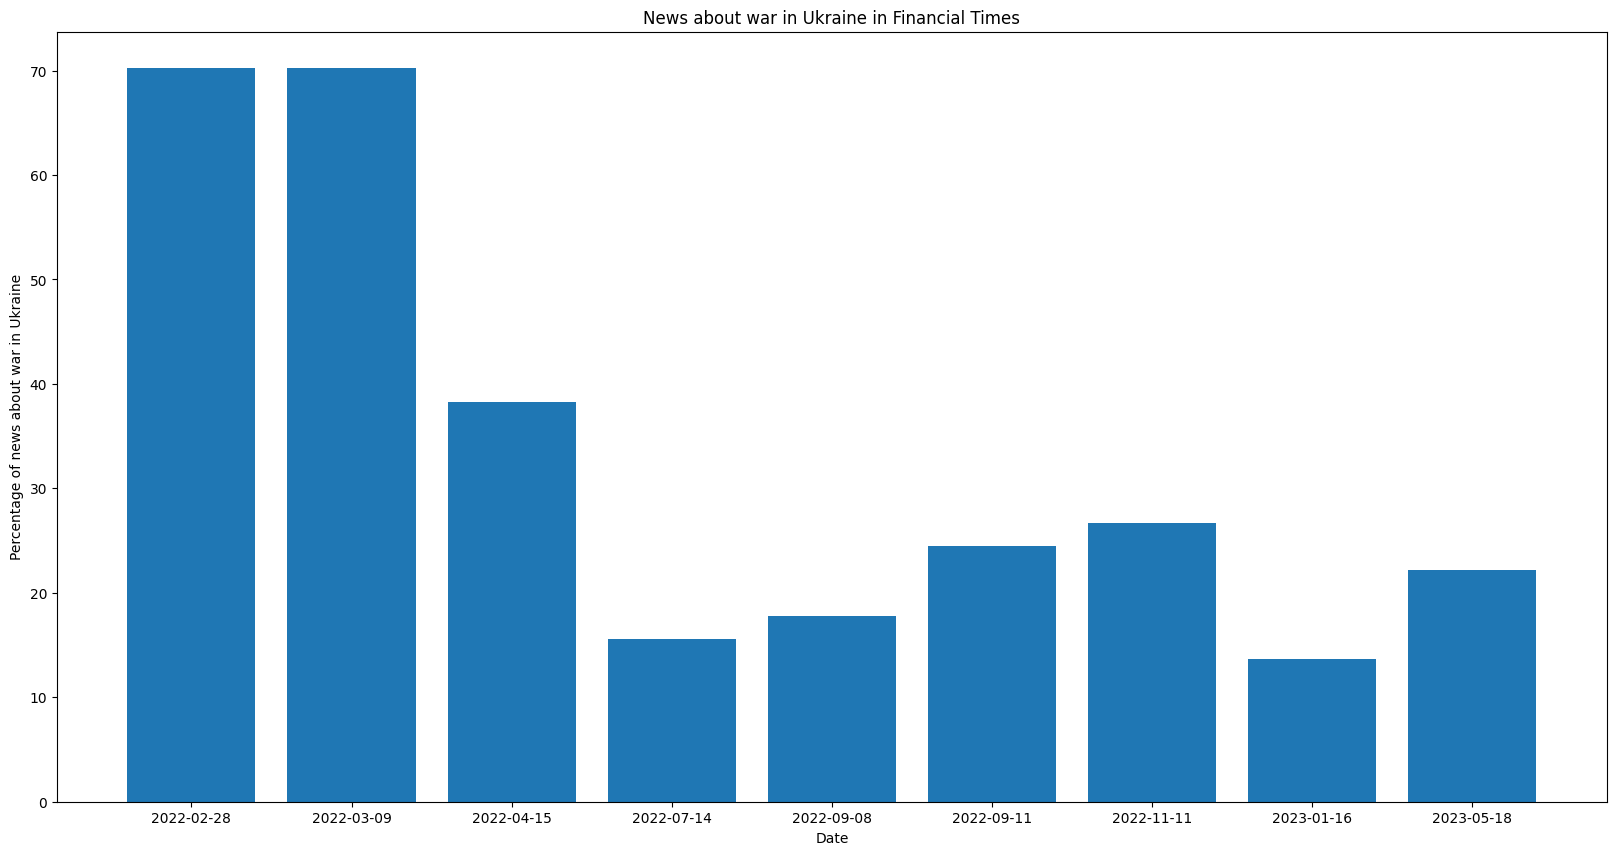

In [60]:

plt.figure(figsize=(20, 10))
plt.bar(str_dates, war_perc)
plt.xlabel('Date')
plt.ylabel('Percentage of news about war in Ukraine')
plt.title('News about war in Ukraine in Financial Times')
plt.show()